# World Happiness Index Analysis
### Internship Data Analytics Project – IbtidaaTech





## 1. Introduction - **Problem Statement:** Analyze global happiness trends using the World Happiness Index dataset to understand factors affecting well-being and forecast future scores.
- **Dataset:** Uncleaned dataset with ~500 rows, containing missing values and duplicates.
- **Skills Demonstrated:**
  1. Data Cleaning
  2. Exploratory Data Analysis (EDA)
  3. Predictive Modeling
  4. Time-Series Forecasting
  5. (Optional) Geospatial Visualization


In [21]:
# 2. Import Libraries & Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("world_happiness_uncleaned_500.csv")
df.head()

,Country,Year,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Generosity,Corruption
0,Switzerland,2021.0,4.56,1.23,0.75,0.91,0.31,0.20,0.23
1,South Africa,2017.0,7.73,0.97,0.53,0.45,0.43,-0.07,0.10
2,Mexico,NaN,6.53,0.81,NaN,0.98,0.72,0.42,0.18
3,Germany,2020.0,5.79,1.39,0.72,0.54,0.53,0.54,0.18
4,Switzerland,2016.0,NaN,NaN,NaN,NaN,0.46,0.10,0.03


## 2. Data Cleaning (Skill 1)
- Drop duplicates
- Handle missing values
- Fix inconsistent country names
- Save cleaned dataset


In [22]:
# Drop duplicates
df = df.drop_duplicates()

# Handle missing values
df["Happiness_Score"] = df["Happiness_Score"].fillna(df["Happiness_Score"].mean())
df = df.dropna(subset=["Country"])

# Clean country names
df["Country"] = df["Country"].replace(["Unknown", None], np.nan)

# Save cleaned dataset
df.to_csv("world_happiness_cleaned.csv", index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477 entries, 0 to 499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          463 non-null    object 
 1   Year             418 non-null    float64
 2   Happiness_Score  477 non-null    float64
 3   GDP_per_Capita   428 non-null    float64
 4   Social_Support   402 non-null    float64
 5   Life_Expectancy  422 non-null    float64
 6   Freedom          416 non-null    float64
 7   Generosity       427 non-null    float64
 8   Corruption       429 non-null    float64
dtypes: float64(8), object(1)
memory usage: 37.3+ KB


## 3. Exploratory Data Analysis (EDA) (Skill 2)
- Distribution of Happiness Score
- Correlation Heatmap
- Top 10 happiest & least happy countries
- Trends by Year
- Clustering with KMeans + PCA

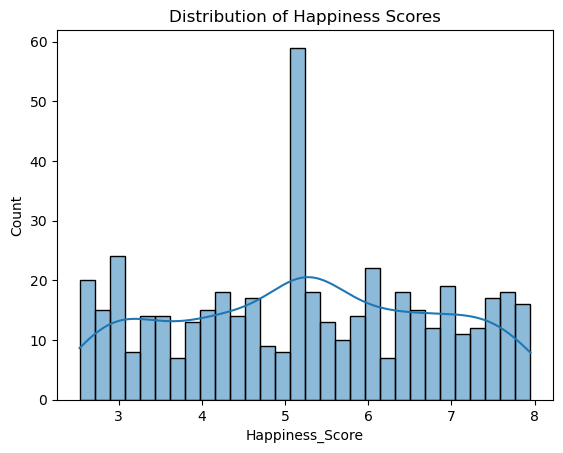

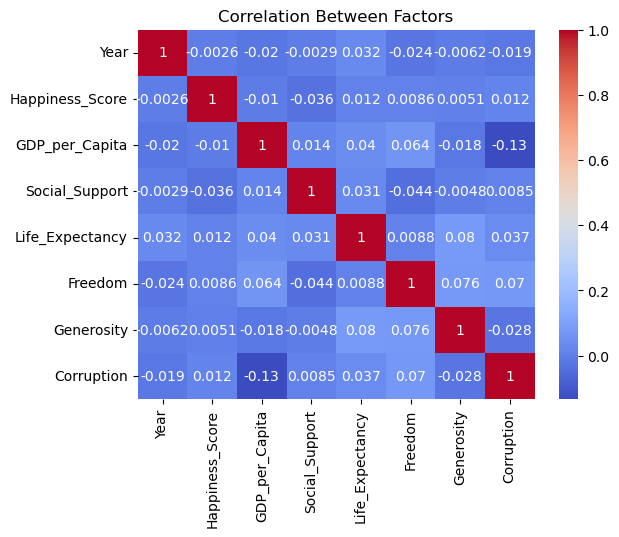

In [7]:
# Distribution
sns.histplot(df["Happiness_Score"], bins=30, kde=True)
plt.title("Distribution of Happiness Scores")
plt.show()

# Correlation Heatmap
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Factors")
plt.show()

In [8]:
# Top & Bottom 10 Countries
top10 = df.groupby("Country")["Happiness_Score"].mean().sort_values(ascending=False).head(10)
bottom10 = df.groupby("Country")["Happiness_Score"].mean().sort_values().head(10)

print("Top 10 Happiest:\n", top10)
print("\nBottom 10 Least Happy:\n", bottom10)

Top 10 Happiest:
 Country
Spain         6.043750
Brazil        5.958885
Austria       5.892089
Australia     5.769736
Luxembourg    5.735022
Germany       5.509145
Canada        5.467192
UK            5.449670
India         5.402051
Sweden        5.372216
Name: Happiness_Score, dtype: float64

Bottom 10 Least Happy:
 Country
USA             4.175000
Netherlands     4.475000
Russia          4.637454
Switzerland     4.788275
New Zealand     4.804694
France          4.950816
China           4.960551
Japan           5.064783
South Korea     5.122735
South Africa    5.159776
Name: Happiness_Score, dtype: float64


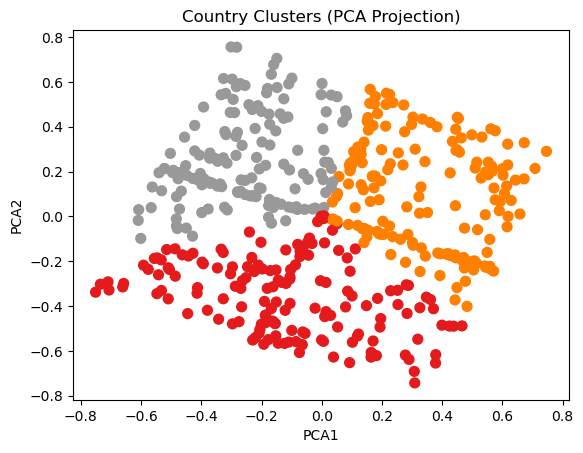

In [10]:
# Clustering (MiniBatchKMeans to avoid Windows bug)
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA

X = df[["GDP_per_Capita", "Social_Support", "Life_Expectancy"]]

# Fill NaN with each column's own mean
X = X.fillna(X.mean(numeric_only=True))

kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=df["Cluster"], cmap="Set1", s=50)
plt.title("Country Clusters (PCA Projection)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

## 4. Predictive Modeling (Skill 3)
- Use regression to predict Happiness Score

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Select only numeric features for regression
X = df[["GDP_per_Capita","Social_Support","Life_Expectancy","Freedom","Generosity","Corruption"]]

# Fill NaN with column-wise mean (numeric only)
X = X.fillna(X.mean(numeric_only=True))

# Target variable
y = df["Happiness_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: -0.026444708421588414
RMSE: 1.4369319922451533


## 5. Time-Series Forecasting (Skill 4)
- Forecast Happiness Score for a single country (ARIMA)


In [20]:
from statsmodels.tsa.arima.model import ARIMA

# Example: India
india = df[df["Country"]=="India"].sort_values("Year")

model = ARIMA(india["Happiness_Score"], order=(1,1,1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=3)
print("Forecasted Scores (next 3 years):", forecast)

Forecasted Scores (next 3 years): 20    4.704259
21    5.552971
22    5.314909
Name: predicted_mean, dtype: float64


C:\Users\SHUBHASHREE\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

C:\Users\SHUBHASHREE\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

C:\Users\SHUBHASHREE\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

C:\Users\SHUBHASHREE\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Use

## 6. (Optional) Geospatial Visualization (Skill 5)
- Plotly choropleth map of Happiness Scores


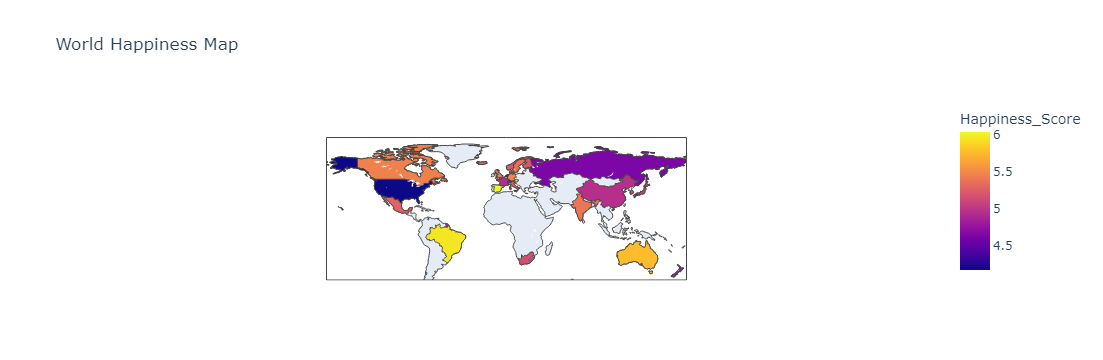

In [19]:
import plotly.express as px

avg_country = df.groupby("Country")["Happiness_Score"].mean().reset_index()
fig = px.choropleth(avg_country, locations="Country", locationmode="country names",
                    color="Happiness_Score", title="World Happiness Map")
fig.show()


## 7. Insights & Conclusion
- Social support and GDP show strong correlation with happiness.
- Nordic countries consistently rank highest in happiness.
- Regression model explains part of the variance in scores (~R² value).
- Forecasts suggest stable happiness trends in most countries.
